# 一些data预处理

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
df= pd.read_csv('transactions_n100000.csv')
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019/2/28 18:33,4,shake,2,41.889047,-87.803605
1,0x872a40,2019/2/28 18:33,4,burger,2,41.889047,-87.803605
2,0x872a40,2019/2/28 18:33,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019/9/18 11:59,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019/9/18 11:59,5,salad,2,41.881818,-87.640234


## 转换一下时间，加一列月份

In [4]:
df['order_timestamp'] = pd.to_datetime(df['order_timestamp']) 
df['order_month']=df['order_timestamp'].dt.month
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,order_month
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,2
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,2
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,2
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,9
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,9


In [5]:
df['order_year']=df['order_timestamp'].dt.year

In [6]:
year_item_num_pivot = pd.pivot_table(data = df,index ='order_year',columns = 'item_name',values = 'item_count',aggfunc=np.sum)
year_item_num_pivot

item_name,burger,fries,salad,shake
order_year,,,,
2019,185846,256867,71021,124149


## 加一列星期数，但发现购买行为和星期几无关

In [297]:
df['weekdaynum'] = df['order_timestamp'].apply(lambda x: x.weekday()+1)
df['weekdaynum'].value_counts()

5    37708
3    37278
1    37255
7    37236
2    37206
6    37075
4    36983
Name: weekdaynum, dtype: int64

In [298]:
pd.pivot_table(data = df,index = 'location',columns = 'weekdaynum',values = 'item_count',aggfunc = 'sum')

weekdaynum,1,2,3,4,5,6,7
location,,,,,,,
1,6359,6509,6619,6140,6645,6456,6676
2,9761,10117,9771,9780,10180,10151,10048
3,6452,6523,6776,6406,5972,6404,6723
4,15043,15196,15619,14731,15002,15318,14945
5,5855,6125,6409,6196,6402,6388,6373
6,9953,10179,9901,9757,10128,9586,9757
7,14402,14496,15309,15130,15802,14653,14637
8,7442,7191,6686,6530,7027,6787,7096
9,15328,14762,14671,15196,15626,15006,14775


# 原始数据Pivot：看一些关于item的

## 每个月每个品类分别总共点了几个：fries最多，其次burger

In [43]:
month_item_num_pivot = pd.pivot_table(data = df,index ='order_month',columns = 'item_name',values = 'item_count',aggfunc=np.sum)
month_item_num_pivot

item_name,burger,fries,salad,shake
order_month,,,,
1,16146,22257,6111,10851
2,14249,19821,5572,9563
3,15801,21923,6122,10558
4,15045,21051,6006,10063
5,15866,21756,5890,10685
6,15211,20933,5722,10020
7,15857,21803,5946,10452
8,15793,21828,6035,10621
9,15179,20882,5703,10162


## 每个月每个品类分别点了几单：没有什么季节性

In [41]:
month_item_ticket_pivot = pd.pivot_table(data = df,index ='order_month',columns = 'item_name',values = 'item_count',aggfunc='count')
month_item_ticket_pivot

item_name,burger,fries,salad,shake
order_month,,,,
1,6551,8611,3286,3984
2,5826,7687,3000,3546
3,6456,8559,3290,3900
4,6216,8232,3217,3786
5,6440,8475,3223,3986
6,6279,8200,3088,3759
7,6447,8482,3233,3900
8,6460,8467,3263,3964
9,6258,8166,3095,3807


## 每个月每个品类平均一单点几个：也没有什么季节性

In [42]:
month_item_num_pivot = pd.pivot_table(data = df,index ='order_month',columns = 'item_name',values = 'item_count')
month_item_num_pivot

item_name,burger,fries,salad,shake
order_month,,,,
1,2.464662,2.584717,1.859708,2.723645
2,2.445760,2.578509,1.857333,2.696842
3,2.447491,2.561397,1.860790,2.707179
4,2.420367,2.557216,1.866957,2.657950
5,2.463665,2.567080,1.827490,2.680632
6,2.422520,2.552805,1.852979,2.665603
7,2.459594,2.570502,1.839159,2.680000
8,2.444737,2.578009,1.849525,2.679364
9,2.425535,2.557188,1.842649,2.669293


## 每家店分别有多少单：2、4、6、7、9点单数多

In [39]:
store_ticket_num_pivot = pd.pivot_table(data = df,index ='location',values = 'ticket_id',aggfunc='count')
store_ticket_num_pivot

,ticket_id
location,
1,21216
2,37343
3,21257
4,33890
5,20291
6,37032
7,33547
8,22082
9,34083


## 每家店每个品类分别点了几单（一次点3个算1单）

In [38]:
item_ticket_num_pivot = pd.pivot_table(data = df,index ='location',columns = 'item_name',values = 'item_count',aggfunc='count')
item_ticket_num_pivot

item_name,burger,fries,salad,shake
location,,,,
1,4042,8682,6481,2011
2,14661,15771,1926,4985
3,4028,8691,6487,2051
4,10347,11338,2822,9383
5,3619,8307,6449,1916
6,14520,15607,1938,4967
7,10222,11237,2849,9239
8,4240,8962,6564,2316
9,10435,11405,2828,9415


## 每家店每个品类一单平均点了几个：每家店pattern不太一样，4789的burger+fries很多

In [44]:
store_item_ave_pivot = pd.pivot_table(data = df,index ='location',columns = 'item_name',values = 'item_count')
store_item_ave_pivot

item_name,burger,fries,salad,shake
location,,,,
1,1.889659,2.360401,1.983490,2.196917
2,1.886229,1.962082,1.708204,1.588766
3,1.873635,2.348867,1.983505,2.158947
4,3.248381,3.336920,1.496456,3.217095
5,1.897762,2.375948,1.995503,2.230689
6,1.892424,1.969116,1.679051,1.569760
7,3.230483,3.326066,1.527905,3.212361
8,2.025236,2.419214,1.994820,2.330311
9,3.204696,3.301797,1.490806,3.191715


## 每家店每个品类分别一共点过几个（一次点3个算3个），用了total，可以看一下每家店的销量结构

In [49]:
item_ticket_num_pivot = pd.pivot_table(data = df,index ='location',columns = 'item_name',values = 'item_count',aggfunc=[np.sum],margins=True,
                         margins_name="Total")
item_ticket_num_pivot

sum                               
item_name  burger   fries  salad   shake   Total
location                                        
1            7638   20493  12855    4418   45404
2           27654   30944   3290    7920   69808
3            7547   20414  12867    4428   45256
4           33611   37834   4223   30186  105854
5            6868   19737  12869    4274   43748
6           27478   30732   3254    7797   69261
7           33022   37375   4353   29679  104429
8            8587   21681  13094    5397   48759
9           33441   37657   4216   30050  105364
Total      185846  256867  71021  124149  637883

## 每单购买的各品类数量

In [207]:
ticket_item_total_pivot = pd.pivot_table(data = df,index ='ticket_id',columns = 'item_name',values = 'item_count',aggfunc='sum')
ticket_item_total_pivot

item_name,burger,fries,salad,shake
ticket_id,,,,
0x100048,NaN,3.0,3.0,NaN
0x100057,1.0,1.0,NaN,NaN
0x1000ba,1.0,2.0,1.0,1.0
0x1000fb,4.0,5.0,1.0,4.0
0x10016e,3.0,3.0,NaN,3.0
...,...,...,...,...
0xffddf,3.0,3.0,NaN,3.0
0xffe25,2.0,2.0,NaN,NaN
0xffec9,NaN,1.0,1.0,NaN


# 看一些关于hour的

In [13]:
df['order_hour']=df['order_timestamp'].dt.hour
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,order_month,order_year,order_hour
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,2,2019,18
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,2,2019,18
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,2,2019,18
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,9,2019,11
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,9,2019,11


## 总体的点单时间分布

In [56]:
df['order_hour'].value_counts()

0     52819
18    40870
12    30449
19    26110
17    25315
13    19485
11    19032
1     12583
23    12516
20     6805
16     6586
14     5205
15     1463
21     1036
22      467
Name: order_hour, dtype: int64

## 每家店每个时段的点单人数

In [69]:
store_hour_pivot = pd.pivot_table(data = df,index ='location',columns = 'order_hour',values = 'item_count',aggfunc='count',margins=True,
                         margins_name="Total")
store_hour_pivot

order_hour,0,1,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
location,,,,,,,,,,,,,,,,
1,1675,429,3872,6022,3880,1066,201,247,782,1282,872,276,91,72,449,21216
2,21163,4891,817,1225,832,197,59,174,800,1270,827,218,33,60,4777,37343
3,1700,380,3751,6277,3797,1042,197,257,759,1390,823,285,98,69,432,21257
4,1604,385,807,1211,763,237,171,1756,6890,10885,6961,1686,162,22,350,33890
5,1000,344,3763,5994,3960,1011,206,269,843,1312,862,242,113,60,312,20291
6,20848,4996,713,1353,684,231,40,185,777,1175,785,265,36,41,4903,37032
7,1592,336,732,1276,836,215,208,1685,6466,10906,6911,1768,188,25,403,33547
8,1711,423,3858,5896,3959,965,184,320,1046,1601,1156,320,97,100,446,22082
9,1526,399,719,1195,774,241,197,1693,6952,11049,6913,1745,218,18,444,34083


## 每个品类不同时段的点的个数

In [72]:
item_hour_total_pivot = pd.pivot_table(data = df,index ='item_name',columns = 'order_hour',values = 'item_count',aggfunc='sum',margins=True,
                         margins_name="Total")
item_hour_total_pivot

order_hour,0,1,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
item_name,,,,,,,,,,,,,,,,
burger,40324,9341,2761,4406,2742,786,783,6779,27711,44601,28125,7221,774,161,9331,185846
fries,41474,9798,18131,29241,18632,4970,1571,7425,29323,47193,29963,7830,1123,423,9770,256867
salad,1150,457,15370,24835,15890,4184,788,646,1612,2592,1838,609,349,262,439,71021
shake,7419,1779,915,1524,935,308,670,6355,26191,42268,26568,6806,695,54,1662,124149
Total,90367,21375,37177,60006,38199,10248,3812,21205,84837,136654,86494,22466,2941,900,21202,637883


## 每个品类不同时段平均每单点的个数

In [73]:
item_hour_ave_pivot = pd.pivot_table(data = df,index ='item_name',columns = 'order_hour',values = 'item_count')
item_hour_ave_pivot

order_hour,0,1,11,12,13,14,15,16,17,18,19,20,21,22,23
item_name,,,,,,,,,,,,,,,
burger,1.793373,1.765117,1.142798,1.144416,1.131188,1.200000,2.709343,3.364268,3.482594,3.476577,3.448382,3.440210,3.011673,1.610000,1.763894
fries,1.816088,1.803756,2.242825,2.262535,2.236735,2.250906,2.805357,3.510638,3.638992,3.639469,3.615663,3.560709,3.035135,2.180412,1.797608
salad,1.163968,1.455414,2.006266,2.029335,2.026786,2.020280,2.036176,1.351464,1.153076,1.120138,1.169211,1.362416,1.856383,1.898551,1.416129
shake,1.139806,1.151456,1.050517,1.060543,1.049383,1.136531,2.951542,3.212841,3.314477,3.312539,3.282026,3.303883,3.144796,1.542857,1.122215


# 9家店的对比：分月份，不同品类平均每单点的个数

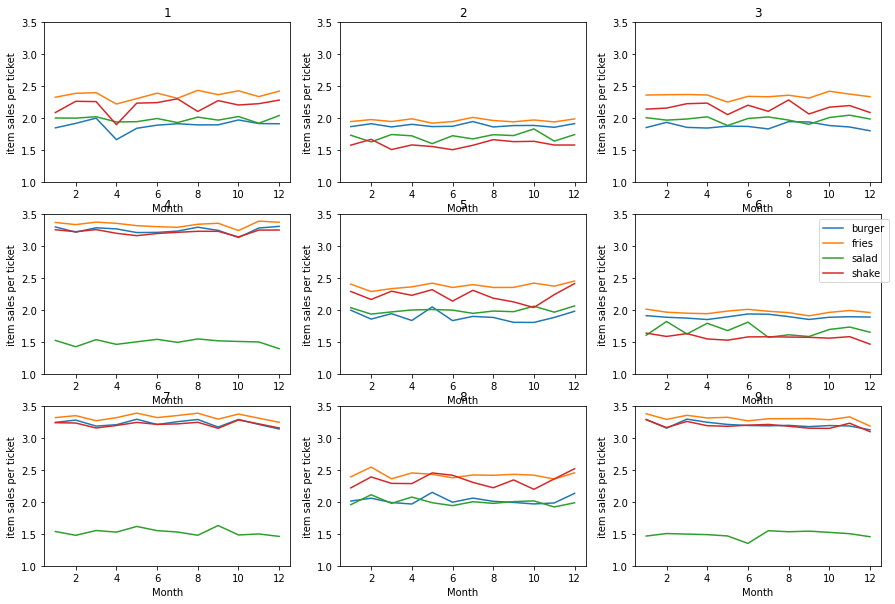

In [154]:
#平均每单买几个
plt.figure(figsize= (15,10))
for i in range(1,10):    
    store_item_month = pd.pivot_table(data = df.loc[df['location']==i],index ='order_month',columns = 'item_name',values = 'item_count')
    plt.subplot(3,3,i)
    plt.plot(store_item_month)
    plt.ylim(1,3.5)
    plt.xlabel('Month')
    plt.ylabel('item sales per ticket')
    if i == 6:
        plt.legend(store_item_month.columns,bbox_to_anchor=(1.05,1.0))

    plt.title(i)

    
plt.show()

# 9家店的对比：每个月不同品类总的销量

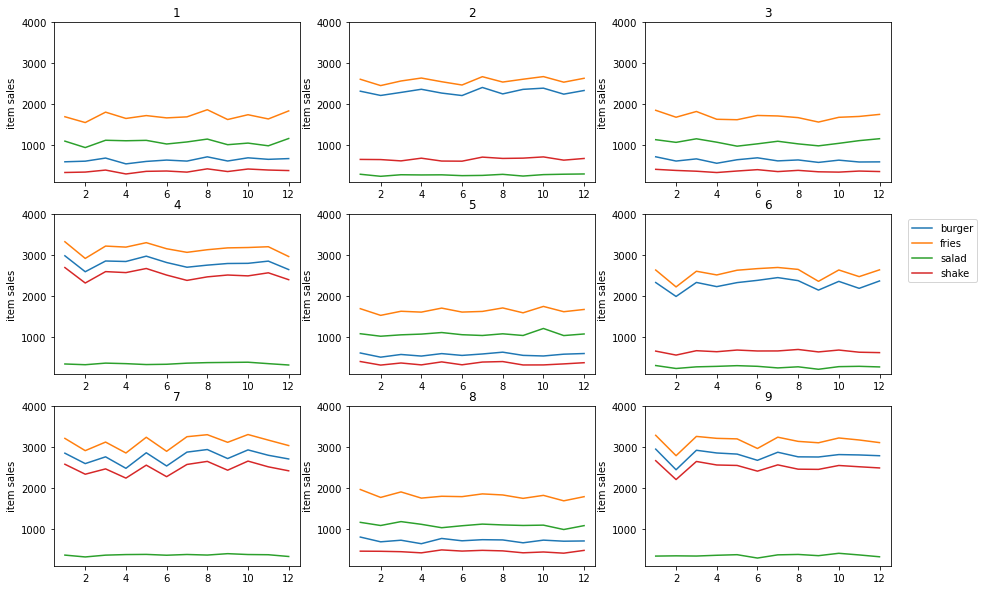

In [36]:
#每个月每家店各品类销量
plt.figure(figsize= (15,10))
for i in range(1,10):    
    store_item_month = pd.pivot_table(data = df.loc[df['location']==i],index ='order_month',columns = 'item_name',values = 'item_count',aggfunc = 'sum')
    plt.subplot(3,3,i)
    plt.plot(store_item_month)
    plt.ylim(100,4000)
    #plt.xlabel('Month')
    plt.ylabel('item sales')
    if i == 6:
        plt.legend(store_item_month.columns,bbox_to_anchor=(1.05,1.0))

    plt.title(i)

    
plt.show()

# 9家店对比：每个月不同品类的单数（一次买3个算1单） 

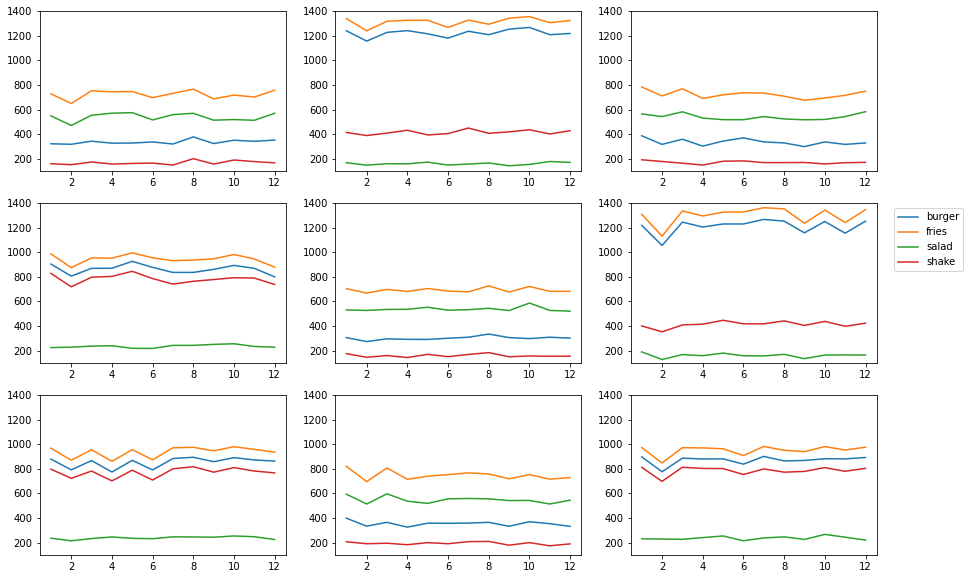

In [41]:
#每个月每家店各品类单数
plt.figure(figsize= (15,10))
for i in range(1,10):    
    store_item_month = pd.pivot_table(data = df.loc[df['location']==i],index ='order_month',columns = 'item_name',values = 'item_count',aggfunc = 'count')
    plt.subplot(3,3,i)
    plt.plot(store_item_month)
    plt.ylim(100,1400)
    #plt.xlabel('Month')
    #plt.ylabel('ticket number')
    if i == 6:
        plt.legend(store_item_month.columns,bbox_to_anchor=(1.05,1.0))

    #plt.title(i)
    plt.savefig('%s.jpg'%(i))

    
plt.show()

# K-means

In [212]:
ticket_item_total_pivot.fillna(value = 0,inplace = True)


In [215]:
ticket_item_total_pivot.to_csv('1.csv')

In [27]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [178]:
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,order_month,order_hour
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,2,18
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,2,18
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,2,18
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,9,11
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,9,11


In [179]:
df_hour = df[['ticket_id','order_hour']]

In [216]:
df_hour = df_hour.drop_duplicates()
df_hour.to_csv('hour.csv')

In [256]:
pivot1 = pd.read_csv('1.csv')
pivot1.head()

,ticket_id,burger,fries,salad,shake,hour
0,0x100048,0,3,3,0,12
1,0x100057,1,1,0,0,0
2,0x1000ba,1,2,1,1,12
3,0x1000fb,4,5,1,4,19
4,0x10016e,3,3,0,3,17


In [257]:
pivot1.set_index('ticket_id', inplace = True)

In [300]:
pivot1

,burger,fries,salad,shake,hour
ticket_id,,,,,
0x100048,0,3,3,0,12
0x100057,1,1,0,0,0
0x1000ba,1,2,1,1,12
0x1000fb,4,5,1,4,19
0x10016e,3,3,0,3,17
...,...,...,...,...,...
0xffddf,3,3,0,3,18
0xffe25,2,2,0,0,0
0xffec9,0,1,1,0,13


## find K

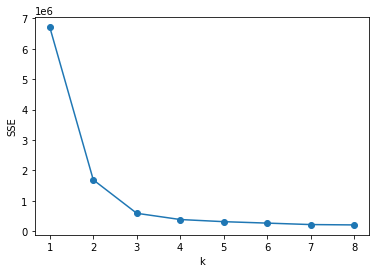

In [258]:
SSE = []
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(pivot1)
    SSE.append(estimator.inertia_)
X = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

## 跑一下model

In [296]:
model_k3 = KMeans(n_clusters=3)
model_k3.fit(pivot1)
model_k3.cluster_centers_

array([[ 0.34081841,  2.24434753,  1.90352912,  0.12068912, 12.23243945],
       [ 1.75687148,  1.81371821,  0.05684672,  0.32537408,  0.19215395],
       [ 3.17670051,  3.37647208,  0.19977157,  2.81850254, 18.75215736]])

In [229]:
pivot1.columns

Index(['burger', 'fries', 'salad', 'shake', 'hour'], dtype='object')

In [295]:
model_k4 = KMeans(n_clusters=4)
model_k4.fit(pivot1)
model_k4.cluster_centers_

array([[ 0.34040971,  2.24635076,  1.90594105,  0.11944091, 12.22431586],
       [ 3.68936001,  3.87359411,  0.1842341 ,  3.49858996, 17.95925815],
       [ 1.75687148,  1.81371821,  0.05684672,  0.32537408,  0.19215395],
       [ 1.50123351,  1.75458543,  0.25335193,  0.60559906, 21.29893811]])

In [291]:
model_k5 = KMeans(n_clusters=5)
model_k5.fit(pivot1)
model_k5.cluster_centers_

array([[ 1.61568167,  1.8221961 ,  0.20651444,  0.2981867 , 22.83394896],
       [ 1.75687148,  1.81371821,  0.05684672,  0.32537408,  0.19215395],
       [ 0.33658659,  2.25156406,  1.91497748,  0.11502127, 12.18790666],
       [ 4.13903007,  4.31905192,  0.18002185,  3.93430865, 18.01391726],
       [ 2.24705975,  2.49607966,  0.24901992,  2.09103027, 17.99066959]])

In [255]:
pivot1.columns

Index(['burger', 'fries', 'salad', 'shake', 'hour'], dtype='object')

In [303]:
model_k5.labels_

array([2, 1, 2, ..., 2, 1, 4], dtype=int32)

In [304]:
label = pd.DataFrame(model_k5.labels_)
label

,0
0,2
1,1
2,2
3,3
4,4
...,...
99995,4
99996,1
99997,2
99998,1


In [308]:
label_list = list(model_k5.labels_)
label_list

[2,
 1,
 2,
 3,
 4,
 4,
 4,
 3,
 0,
 2,
 2,
 4,
 3,
 2,
 4,
 3,
 2,
 2,
 0,
 3,
 2,
 1,
 4,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 4,
 2,
 2,
 2,
 3,
 4,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 2,
 1,
 4,
 2,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 3,
 2,
 2,
 1,
 1,
 0,
 3,
 1,
 2,
 4,
 2,
 2,
 2,
 3,
 0,
 2,
 3,
 2,
 0,
 2,
 2,
 4,
 1,
 1,
 2,
 2,
 2,
 4,
 3,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 0,
 4,
 3,
 3,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 3,
 2,
 1,
 2,
 1,
 4,
 2,
 1,
 3,
 4,
 2,
 4,
 1,
 4,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 4,
 3,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 4,
 3,
 4,
 3,
 2,
 4,
 2,
 2,
 4,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 4,
 1,
 3,
 2,
 2,
 2,
 0,
 1,
 0,
 4,
 4,
 0,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 4,
 1,
 2,
 4,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 4,
 4,
 2,
 2,
 0,
 4,
 3,
 1,
 4,
 1,
 3,
 2,
 2,
 2,
 2,
 1,
 3,


In [311]:
new = pivot1
new.head()
#new.iloc[0,4]

,burger,fries,salad,shake,hour,cluster
ticket_id,,,,,,
0x100048,0,3,3,0,12,NaN
0x100057,1,1,0,0,0,NaN
0x1000ba,1,2,1,1,12,NaN
0x1000fb,4,5,1,4,19,NaN
0x10016e,3,3,0,3,17,NaN


In [313]:
for i in range(0,100000):
    new.iloc[i,5] = label_list[i]

new

,burger,fries,salad,shake,hour,cluster
ticket_id,,,,,,
0x100048,0,3,3,0,12,2.0
0x100057,1,1,0,0,0,1.0
0x1000ba,1,2,1,1,12,2.0
0x1000fb,4,5,1,4,19,3.0
0x10016e,3,3,0,3,17,4.0
...,...,...,...,...,...,...
0xffddf,3,3,0,3,18,4.0
0xffe25,2,2,0,0,0,1.0
0xffec9,0,1,1,0,13,2.0


In [314]:
new.groupby('cluster')['hour'].value_counts()

cluster  hour
0.0      23       5430
         21        209
         22        190
         20        127
1.0      0       22837
         1        5432
2.0      12      12924
         13       8330
         11       8084
         14       2197
         15        365
         16         68
3.0      18       8146
         19       5078
         17       5056
         20       1315
         16       1186
         15        128
         21        128
         14          7
         23          5
         22          4
4.0      18       4821
         19       3209
         17       3002
         16        861
         20        757
         15         67
         21         33
         14          4
Name: hour, dtype: int64

In [315]:
ticket_store = df[['ticket_id','location']]
ticket_store =ticket_store.drop_duplicates()
ticket_store

,ticket_id,location
0,0x872a40,4
3,0x598eb3,5
6,0x5646c2,3
8,0x4022cf,4
10,0x7a39d9,7
...,...,...
260728,0x75c9e7,6
260730,0x66f1df,6
260732,0x4e2756,8
260735,0x3c0582,9


In [317]:
new.reset_index(inplace = True)

In [319]:
neww = pd.merge(new,ticket_store,on='ticket_id')
neww

,ticket_id,burger,fries,salad,shake,hour,cluster,location
0,0x100048,0,3,3,0,12,2.0,1
1,0x100057,1,1,0,0,0,1.0,6
2,0x1000ba,1,2,1,1,12,2.0,5
3,0x1000fb,4,5,1,4,19,3.0,4
4,0x10016e,3,3,0,3,17,4.0,7
...,...,...,...,...,...,...,...,...
99995,0xffddf,3,3,0,3,18,4.0,4
99996,0xffe25,2,2,0,0,0,1.0,6
99997,0xffec9,0,1,1,0,13,2.0,1
99998,0xffedb,1,1,0,0,0,1.0,2


In [325]:
location_cluster = pd.pivot_table(data = neww,index ='location',columns = 'cluster',values = 'ticket_id',aggfunc='count')

In [326]:
location_cluster.to_csv('location_cluster.csv')